# ISL Lab 08. Tree-Based Methods

In [1]:
# imports and setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.float_format', '{:20,.5f}'.format) # get rid of scientific notation
plt.style.use('seaborn') # pretty matplotlib plots

## 8.3.1 Fitting Classification Trees

In [2]:
# 데이터 불러오기
carseats = pd.read_csv('../datasets/Carseats.csv', index_col=0)
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50000,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22000,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06000,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40000,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15000,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57000,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14000,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41000,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94000,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# 8보다 크면 True => Yes로 매핑 / 8보다 작으면 False => No로 매핑
carseats['High'] = (carseats['Sales'] > 8).map({True:'Yes', False:'No'})

In [4]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  High         400 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 40.6+ KB


In [5]:
# object => category로 변경
carseats['ShelveLoc'] = carseats['ShelveLoc'].astype('category')
carseats['Urban'] = carseats['Urban'].astype('category')
carseats['US'] = carseats['US'].astype('category')
carseats['High'] = carseats['High'].astype('category')
carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
 11  High         400 non-null    category
dtypes: category(4), float64(1), int64(7)
memory usage: 30.1 KB


In [6]:
# 범주형 변수 인코딩
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder() # 첫번째 범주=0, 두번째 범주=1, 세번째 범주=2, ... 로 인코딩 하는 인코더
carseats['ShelveLoc'] = le.fit_transform(carseats['ShelveLoc'])
carseats['Urban'] = le.fit_transform(carseats['Urban'])
carseats['US'] = le.fit_transform(carseats['US'])

In [7]:
# features => X, target => y 로 할당
X = carseats.loc[:, 'CompPrice':'US']
y = carseats.loc[:, 'High']

In [8]:
# 모델링
from sklearn.tree import DecisionTreeClassifier

tree_carseats = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6) # 모델 선언
tree_carseats.fit(X, y) # 모델 fitting
y_pred = tree_carseats.predict(X) # 예측

tree_carseats.score(X, y) # 성능 확인

0.8775

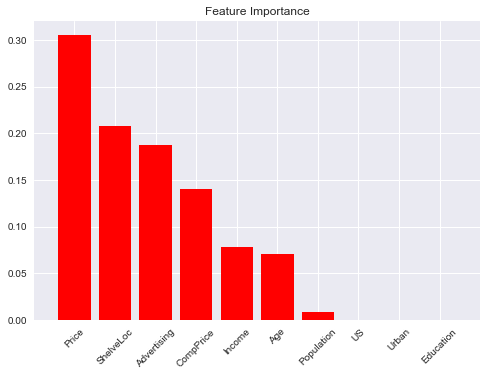

In [9]:
# Feature Importance
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(tree_carseats,
                         feature_names=X.columns,
                         x_tick_rotation=45)

In [10]:
# Decision Tree 도식화
from sklearn.tree import export_graphviz
from graphviz import Source

tree_carseats_graph = export_graphviz(tree_carseats, 
                                      out_file=None, 
                                      feature_names=X.columns,
                                      class_names=tree_carseats.classes_,
                                      filled=True, 
                                      rounded=True,  
                                      special_characters=True)

Source(tree_carseats_graph)

ModuleNotFoundError: No module named 'graphviz'

In [11]:
# split trainset / testset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.5, 
                                                    test_size=0.5, 
                                                    random_state=42)

In [12]:
# 모델링
tree_carseats_tt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6) # 모델 선언
tree_carseats_tt.fit(X_train, y_train) # 모델 fitting
y_pred = tree_carseats_tt.predict(X_test)

In [13]:
print('trainset score: ', tree_carseats_tt.score(X_train, y_train))
print('testset  score: ', tree_carseats_tt.score(X_test, y_test))

trainset score:  0.9
testset  score:  0.73


In [14]:
# 분류 성능 평가 지표
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.71      0.75       117
         Yes       0.65      0.76      0.70        83

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200



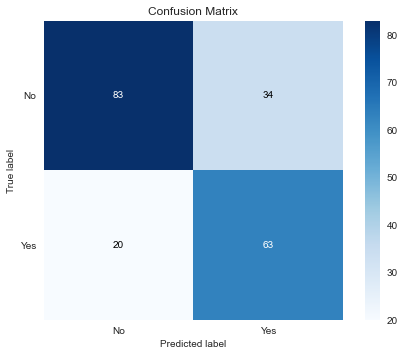

In [15]:
# Confusion Matrix
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_test, y_pred);

## 8.3.2 Fitting Regression Trees

In [16]:
# 데이터 불러오기
boston = pd.read_csv('../datasets/Boston.csv', index_col=0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.00000,2.31000,0,0.53800,6.57500,65.20000,4.09000,1,296,15.30000,396.90000,4.98000,24.00000
2,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2,242,17.80000,396.90000,9.14000,21.60000
3,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2,242,17.80000,392.83000,4.03000,34.70000
4,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3,222,18.70000,394.63000,2.94000,33.40000
5,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3,222,18.70000,396.90000,5.33000,36.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.00000,11.93000,0,0.57300,6.59300,69.10000,2.47860,1,273,21.00000,391.99000,9.67000,22.40000
503,0.04527,0.00000,11.93000,0,0.57300,6.12000,76.70000,2.28750,1,273,21.00000,396.90000,9.08000,20.60000
504,0.06076,0.00000,11.93000,0,0.57300,6.97600,91.00000,2.16750,1,273,21.00000,396.90000,5.64000,23.90000
505,0.10959,0.00000,11.93000,0,0.57300,6.79400,89.30000,2.38890,1,273,21.00000,393.45000,6.48000,22.00000


In [17]:
# features => X, target => y 로 할당
X = boston.loc[:, 'crim':'lstat']
y = boston.loc[:, 'medv']

In [18]:
# split trainset / testset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=42)

In [19]:
# 모델링
from sklearn.tree import DecisionTreeRegressor

tree_boston = DecisionTreeRegressor(min_samples_leaf=5, max_depth=2) # 모델 선언
tree_boston.fit(X_train, y_train) # 모델 fitting
y_pred = tree_boston.predict(X_test) # 예측

In [20]:
print('trainset score: ', tree_boston.score(X_train, y_train))
print('testset  score: ', tree_boston.score(X_test, y_test))

trainset score:  0.7461422238084278
testset  score:  0.6349503884695384


In [21]:
tree_boston_graph = export_graphviz(tree_boston, 
                                    out_file=None, 
                                    feature_names=X.columns,
                                    filled=True, 
                                    rounded=True,  
                                    special_characters=True)

Source(tree_boston_graph)

NameError: name 'Source' is not defined

## 8.3.3 Bagging and Random Forests

In [22]:
# 모델링
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

boston_bag = RandomForestRegressor(max_features=13, random_state=42) # 모델 선언
boston_bag.fit(X_train, y_train) # 모델 fitting
y_pred = boston_bag.predict(X_test) # 예측

In [23]:
# MSE
mean_squared_error(y_test, y_pred)

14.667482976284576

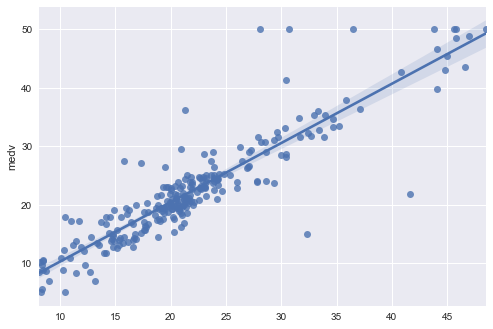

In [24]:
# Regression plot
sns.regplot(y_pred, y_test)

In [25]:
# 모델링 - 하이퍼파라미터 설정
boston_rf = RandomForestRegressor(max_features=6, random_state=42, n_estimators=100) # 모델 선언
boston_rf.fit(X_train, y_train) # 모델 fitting
y_pred = boston_rf.predict(X_test) # 예측

In [26]:
# MSE
mean_squared_error(y_test, y_pred)

12.878658150197625

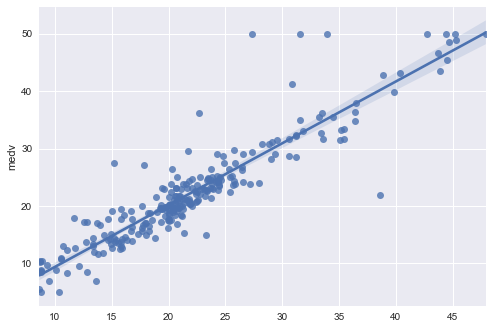

In [27]:
# Regression Plot
sns.regplot(y_pred, y_test)

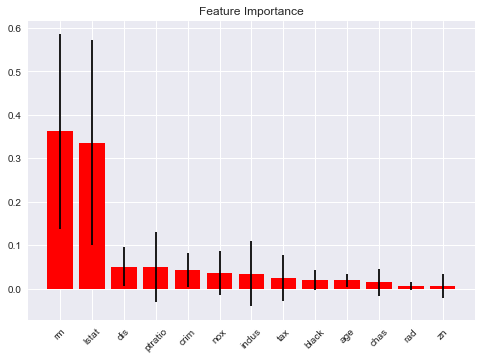

In [28]:
# Feature Importance
plot_feature_importances(boston_rf, 
                         feature_names=X.columns,
                         x_tick_rotation=45)

## 8.3.4 Boosting

In [29]:
# 모델링
from sklearn.ensemble import GradientBoostingRegressor

boston_gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=42) # 모델 선언
boston_gb.fit(X_train, y_train) # 모델 fitting
y_pred = boston_gb.predict(X_test) # 예측

In [30]:
# MSE
mean_squared_error(y_test, y_pred)

16.770864624119454

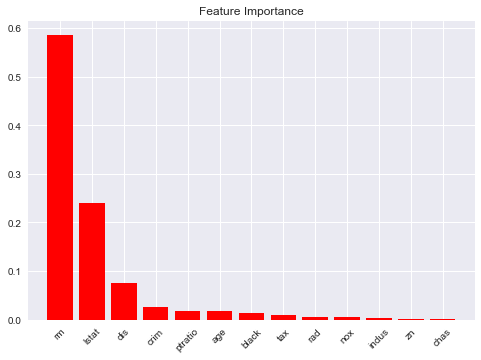

In [31]:
# Feature Importance
plot_feature_importances(boston_gb, 
                         feature_names=X.columns,
                         x_tick_rotation=45)

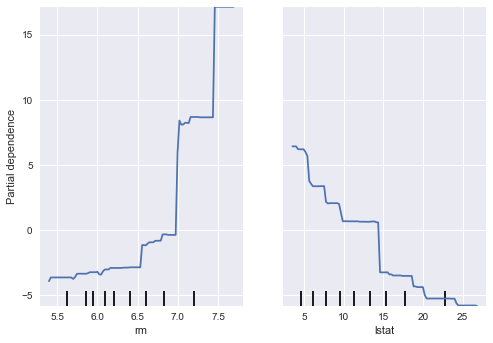

In [32]:
# Partial Dependence Plots
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(boston_gb, X_train, [5, 12], feature_names=X.columns);

In [33]:
# 모델링 - 하이퍼파라미터 설정
boston_gb2 = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=42) # 모델 선언
boston_gb2.fit(X_train, y_train) # 모델 fitting
y_pred = boston_gb2.predict(X_test) # 예측

In [34]:
# MSE
mean_squared_error(y_test, y_pred)

15.275731192364155

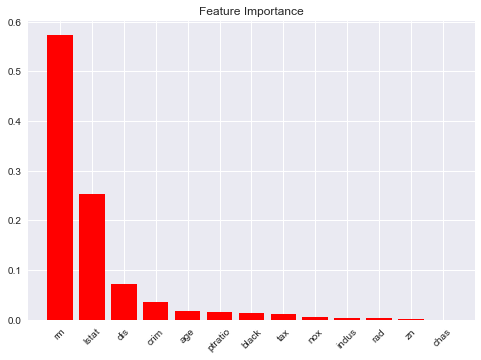

In [35]:
# Feature Importance
plot_feature_importances(boston_gb2, 
                         feature_names=X.columns,
                         x_tick_rotation=45)